In [1]:
import tensorflow as tf
from transformers import *
import numpy as np
import sys

sys.path.append("../../src")
from explainer import Archipelago
from application_utils.text_utils import *
from application_utils.text_utils_tf import BertWrapper
from viz.text import viz_text

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Get Model

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model_path = "../../downloads/pretrained_bert"
model = TFBertForSequenceClassification.from_pretrained(model_path, from_pt=True)
model_wrapper = BertWrapper(model)

## Define Text

In [3]:
text = "I regret to report that these ops are just not extreme enough."
baseline_token = "_"

## Get Sentiment

In [4]:
text_ids, baseline_ids = get_input_baseline_ids(text, baseline_token, tokenizer)

class_idx = 1
logit = model_wrapper([text_ids])[0,class_idx]
polarity = "positive" if logit > 0 else "negative"
print(polarity, logit)

negative -2.5492961


## Explain Prediction

In [5]:
xf = TextXformer(text_ids, baseline_ids) 
apgo = Archipelago(model_wrapper, data_xformer=xf, output_indices=class_idx, batch_size=20)

In [6]:
explanation = apgo.explain(top_k=3)

### Show Explanation

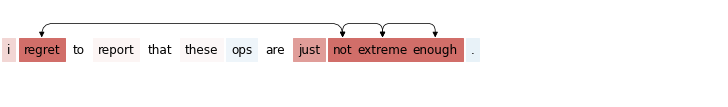

In [7]:
tokens = get_token_list(text_ids, tokenizer)    
explanation, tokens = process_stop_words(explanation, tokens)
fig = viz_text(explanation, tokens)